In [1]:
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler
from swozny_constants import REGRESSORS,CLASSIFIERS
from swozny_ml import benchmark_models,plot_benchmark,plot_learning_curve,tune_params,linear_ensemble,regress,classify

<class 'sklearn.multioutput.MultiOutputRegressor'> failed to init because __init__() missing 1 required positional argument: 'estimator'
<class 'sklearn.ensemble.voting_classifier.VotingClassifier'> failed to init because __init__() missing 1 required positional argument: 'estimators'
<class 'sklearn.multiclass.OneVsRestClassifier'> failed to init because __init__() missing 1 required positional argument: 'estimator'
<class 'sklearn.multiclass.OneVsOneClassifier'> failed to init because __init__() missing 1 required positional argument: 'estimator'
<class 'sklearn.multiclass.OutputCodeClassifier'> failed to init because __init__() missing 1 required positional argument: 'estimator'
<class 'sklearn.multioutput.MultiOutputClassifier'> failed to init because __init__() missing 1 required positional argument: 'estimator'
<class 'sklearn.multioutput.ClassifierChain'> failed to init because __init__() missing 1 required positional argument: 'base_estimator'


/home/swozny/untitled5/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/swozny/untitled5/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/home/swozny/untitled5/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20

In [1]:
X_train = pd.read_csv('train.csv', index_col='PassengerId')
X_test = pd.read_csv('test.csv', index_col='PassengerId')
X = pd.concat([X_test, X_train])
_dataset = X.fillna(np.nan)
dataset = X.fillna(np.nan)
# Initial little cleaning
dataset.loc[dataset['Embarked'].isnull(), 'Embarked'] = 'S'
dataset['Fare'] = dataset['Fare'].map(lambda x: np.log(x) if x > 0 else x)
dataset=pd.get_dummies(dataset,columns=['Embarked','Sex','Pclass'],drop_first=True)

dataset.describe()

NameError: name 'pd' is not defined

# Predict fare

Evaluating RandomForestRegressor                   ... Score -0.29
Evaluating ExtraTreesRegressor                     ... Score -0.29
Evaluating BaggingRegressor                        ... Score -0.30
Evaluating GradientBoostingRegressor               ... Score -0.29
Evaluating AdaBoostRegressor                       ... Score -0.43
Evaluating GaussianProcessRegressor                ... Score -0.30
Evaluating IsotonicRegression                      ... failed.
Evaluating ARDRegression                           ... Score -0.32
Evaluating HuberRegressor                          ... Score -0.31
Evaluating LinearRegression                        ... Score -0.32
Evaluating PassiveAggressiveRegressor              ... Score -1.35
Evaluating SGDRegressor                            ... Score -0.56
Evaluating TheilSenRegressor                       ... Score -0.38
Evaluating RANSACRegressor                         ... Score -0.33
Evaluating KNeighborsRegressor                     ... Score -0.32

/home/swozny/untitled5/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/swozny/untitled5/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/swozny/untitled5/lib/python3.6/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/swozny/untitled5/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/swozny/untitled5/lib/python3.6/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/swozny/untitled5/lib/python3.6/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/s

 failed.
Evaluating DecisionTreeRegressor                   ... Score -0.29
Evaluating ExtraTreeRegressor                      ... Score -0.29
Evaluating SVR                                     ... Score -0.29
Evaluating BayesianRidge                           ... Score -0.32
                    Algorithm      Mean       Std
17         ExtraTreeRegressor -0.289189  0.021559
1         ExtraTreesRegressor -0.287889  0.020758
3   GradientBoostingRegressor -0.287550  0.026077
18                        SVR -0.286025  0.023890
Tuning ExtraTreeRegressor..-0.291104251153
Tuning ExtraTreesRegressor..-0.291346717987
Tuning GradientBoostingRegressor..-0.269768432059
Tuning SVR..-0.274990119606
-0.264270553983


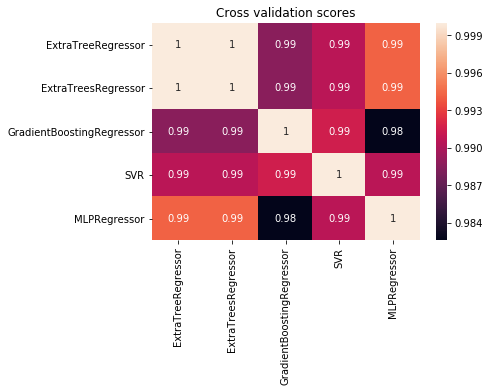

In [4]:
# Split data
fare_params = ['Pclass_2','Pclass_3', 'SibSp', 'Parch', 'Embarked_Q','Embarked_S', 'Sex_male']
train_cond = ~dataset.Fare.isnull()

X_train = dataset[train_cond][fare_params]
y_train = dataset[train_cond].Fare
# Train
fare_model=regress(X_train,y_train)

In [14]:
# Assign
dataset.loc[~train_cond,'Fare']=fare_model.predict(dataset[~train_cond][fare_params])
# Refine
dataset['Fare']=pd.qcut(dataset.Fare,5,labels=[-2,-1,0,1,2])
dataset=pd.get_dummies(data=dataset,columns=['Fare'],drop_first=True)

# Predict Age

Evaluating RandomForestRegressor                   ... Score -9.51
Evaluating ExtraTreesRegressor                     ... Score -9.55
Evaluating BaggingRegressor                        ... Score -9.53
Evaluating GradientBoostingRegressor               ... Score -9.38
Evaluating AdaBoostRegressor                       ... Score -10.22
Evaluating GaussianProcessRegressor                ... Score -9.52
Evaluating IsotonicRegression                      ... failed.
Evaluating ARDRegression                           ... Score -10.00
Evaluating HuberRegressor                          ... Score -9.95
Evaluating LinearRegression                        ... Score -10.04
Evaluating PassiveAggressiveRegressor              ... Score -11.42
Evaluating SGDRegressor                            ... Score -10.46
Evaluating TheilSenRegressor                       ... Score -10.55
Evaluating RANSACRegressor                         ... Score -10.91
Evaluating KNeighborsRegressor                     ... Scor

/home/swozny/untitled5/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/swozny/untitled5/lib/python3.6/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/swozny/untitled5/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/swozny/untitled5/lib/python3.6/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/swozny/untitled5/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/swozny/untitled5/lib/python3.6/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


 failed.
Evaluating DecisionTreeRegressor                   ... Score -9.62
Evaluating ExtraTreeRegressor                      ... Score -9.58
Evaluating SVR                                     ... Score -9.78
Evaluating BayesianRidge                           ... Score -10.04
                   Algorithm      Mean       Std
2           BaggingRegressor -9.533894  0.226150
5   GaussianProcessRegressor -9.520683  0.287686
0      RandomForestRegressor -9.514788  0.211429
3  GradientBoostingRegressor -9.381287  0.239842
Tuning BaggingRegressor..-9.62027602797
Tuning GaussianProcessRegressor..-9.62711337512
Tuning RandomForestRegressor..-9.49882764803
Tuning GradientBoostingRegressor..-9.20575375067
-8.61962042652


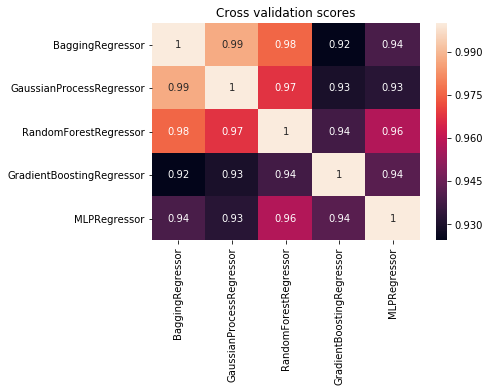

In [5]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
# Scale data
age_params = ['SibSp', 'Parch', 'Pclass_2','Pclass_3','Fare_-1','Fare_0','Fare_1','Fare_2']

# Split test train
train_cond=~dataset.Age.isnull()
X_train=dataset[train_cond][age_params]
y_train=dataset[train_cond].Age
X_test_age = dataset[~train_cond][age_params]
# Train
age_model=regress(X_train,y_train)


In [15]:
# Assign
dataset.loc[~train_cond,'Age']=age_model.predict(X_test_age)
# Refine
dataset['Age']=pd.qcut(dataset.Age,5,labels=[0,1,2,3,4])
dataset=pd.get_dummies(dataset,columns=['Age'],drop_first=True)

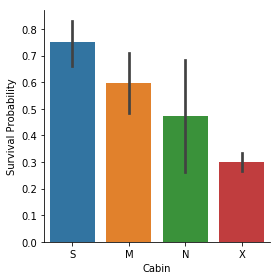

In [16]:

dataset['Cabin']=_dataset.Cabin.fillna('X').map(lambda x:x[0])
dataset['Cabin']=dataset['Cabin'].replace(['B','D','E','A','G','C','F','T'],['S','S','S','N','N','M','M','X'])

g = sns.factorplot(y="Survived",x="Cabin",data=dataset,kind="bar",order=['S','M','N','X'])
g = g.set_ylabels("Survival Probability")

In [17]:
#Location

# Social
dataset['Familysize']=dataset['SibSp']+ dataset['Parch']
dataset['Alone']=(dataset['Familysize']==0).astype('int')
dataset['SmallFamily']=((dataset.Familysize >0)&(dataset.Familysize<4)).astype('int')
dataset['LargeFamily']=((dataset.Familysize >0)&(dataset.Familysize>3)).astype('int')


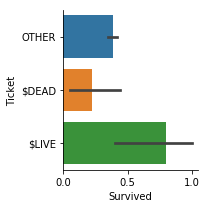

In [18]:
remaining=_dataset.Ticket
remaining=remaining.map(lambda x: f'NUMERICAL{len(x)}' if all(c in "0123456789" for c in x) else x )
remaining=remaining.str.replace('.','')
remaining=remaining.str.replace('\d{2,10}','')
remaining=remaining.str.replace('\s$','')
remaining=remaining.str.replace('SC/Paris','SC/PARIS')
remaining=remaining.str.replace('SOTON/O2','STON/O2')
remaining=remaining.str.replace('SOTON/OQ','STON/O2')
remaining=remaining.str.replace('STON/OQ','STON/O2')
remaining=remaining.str.replace('STON/O 2','STON/O2')
remaining=remaining.str.replace('STON/02','STON/O2')
remaining=remaining.str.replace('CA5OTON','STON/O2')
remaining=remaining.str.replace('CA/SOTON','STON/O2')
remaining=remaining.str.replace('SC/A4','A3')
remaining=remaining.str.replace('SC/A3','A3')
remaining=remaining.str.replace('^A.*','A')
remaining=remaining.str.replace('WE/P','WEP')
remaining=remaining.str.replace('SO/PP 2','SO/PP')
remaining=remaining.str.replace('SO/PP 3','SO/PP')
remaining=remaining.str.replace('SOP','SO/PP')
remaining=remaining.str.replace('P/PP','PP')
remaining=remaining.str.replace('^SO.*','_DEAD')
remaining=remaining.str.replace('^A','_DEAD')
remaining=remaining.str.replace('^W/C','_DEAD')
remaining=remaining.str.replace('^NUMERICAL7','$DEAD')
remaining=remaining.str.replace('^NUMERICAL3','$DEAD')
remaining=remaining.str.replace('^FCC','$LIVE')
remaining=remaining.str.replace('[/\s]','')

remaining=remaining.str.replace(r'^\w+$','OTHER')

dataset.Ticket=remaining
g = sns.factorplot(x="Survived",y="Ticket",data=dataset,size=3,kind='bar')


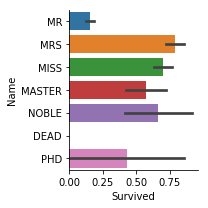

In [20]:
remaining=_dataset.Name
remaining=remaining.str.replace(r'.*Mr\..*','MR')
remaining=remaining.str.replace(r'.*M[rR][sS]\..*','MRS')
remaining=remaining.str.replace(r'.*Miss\..*','MISS')
remaining=remaining.str.replace(r'.*Ms\..*','MISS')
remaining=remaining.str.replace(r'.*Master\..*','MASTER')
remaining=remaining.str.replace(r'.*Dr\..*','PHD')
remaining=remaining.str.replace(r'.*Rev\..*','DEAD')
remaining=remaining.str.replace(r'.*(Sir|Lady|Countess|Jonkheer|Col|Major).*','NOBLE')
remaining=remaining.str.replace(r'.*(Don|Dona|Oberst|Mlle|Mme).*','NOBLE')
remaining=remaining.str.replace(r'.*(Capt).*','DEAD')
dataset.Name=remaining
g = sns.factorplot(x="Survived",y="Name",data=dataset,size=3,kind='bar')

In [23]:
print(dataset.info())
dataset=pd.get_dummies(dataset,columns=['Name','Ticket','Cabin'],drop_first=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 892 to 891
Data columns (total 31 columns):
Parch           1309 non-null int64
SibSp           1309 non-null int64
Survived        891 non-null float64
Embarked_Q      1309 non-null uint8
Embarked_S      1309 non-null uint8
Sex_male        1309 non-null uint8
Pclass_2        1309 non-null uint8
Pclass_3        1309 non-null uint8
Fare_-1         1309 non-null uint8
Fare_0          1309 non-null uint8
Fare_1          1309 non-null uint8
Fare_2          1309 non-null uint8
Age_1           1309 non-null uint8
Age_2           1309 non-null uint8
Age_3           1309 non-null uint8
Age_4           1309 non-null uint8
Familysize      1309 non-null int64
Alone           1309 non-null int64
SmallFamily     1309 non-null int64
LargeFamily     1309 non-null int64
Name_MASTER     1309 non-null uint8
Name_MISS       1309 non-null uint8
Name_MR         1309 non-null uint8
Name_MRS        1309 non-null uint8
Name_NOBLE      1309 non-nu

ValueError: labels ['Name' 'Ticket' 'Cabin'] not contained in axis

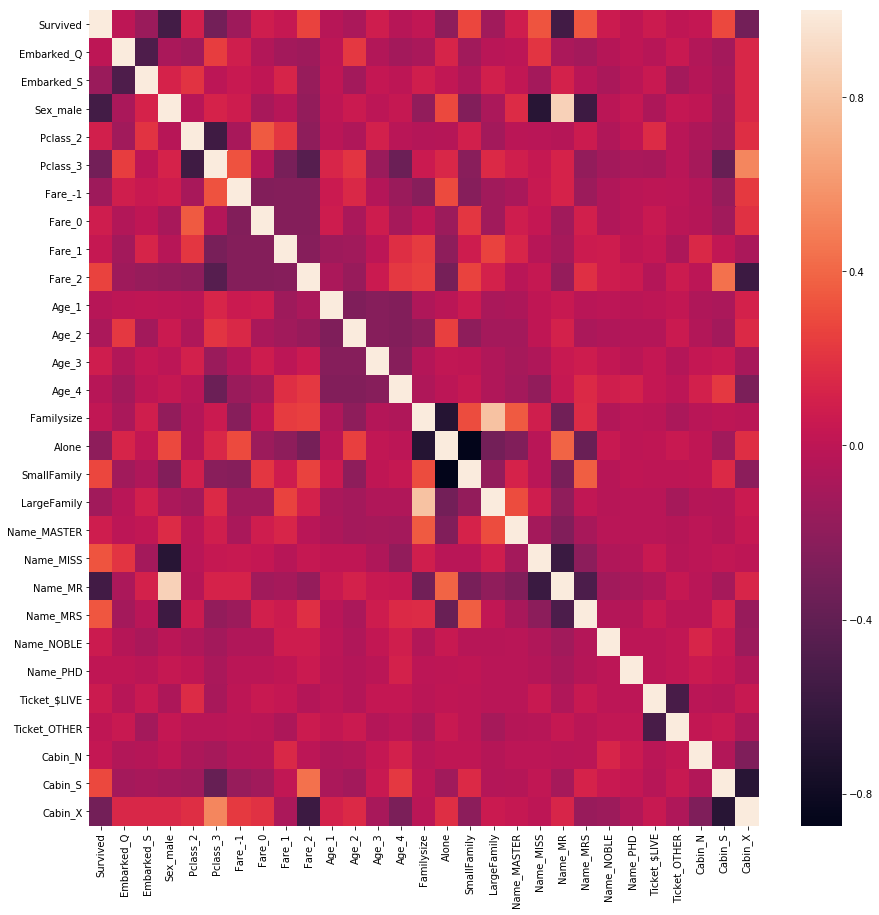

In [28]:
df=dataset.drop(['Parch','SibSp',],axis=1)
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(),ax=ax)

In [32]:
df=pd.read_csv('temp.csv',index_col=['PassengerId'])

Evaluating RandomForestClassifier                   ... Score 0.82
Evaluating ExtraTreesClassifier                     ... Score 0.81
Evaluating BaggingClassifier                        ... Score 0.81
Evaluating GradientBoostingClassifier               ... Score 0.82
Evaluating AdaBoostClassifier                       ... Score 0.81
Evaluating GaussianProcessClassifier                ... Score 0.83
Evaluating LogisticRegression                       ... Score 0.83
Evaluating PassiveAggressiveClassifier              ... Score 0.69
Evaluating RidgeClassifier                          ... Score 0.83
Evaluating SGDClassifier                            ... Score 0.76
Evaluating KNeighborsClassifier                     ... Score 0.81
Evaluating DecisionTreeClassifier                   ... Score 0.79
Evaluating ExtraTreeClassifier                      ... Score 0.80
                    Algorithm      Mean       Std
1        ExtraTreesClassifier  0.812653  0.023647
3  GradientBoostingClassifier

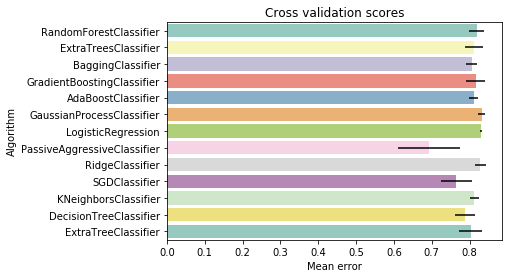

0.881032547699


[('RandomForestClassifier', True),
 ('ExtraTreesClassifier', True),
 ('BaggingClassifier', True),
 ('GradientBoostingClassifier', True),
 ('AdaBoostClassifier', True),
 ('GaussianProcessClassifier', True),
 ('LogisticRegression', True),
 ('PassiveAggressiveClassifier', False),
 ('RidgeClassifier', False),
 ('SGDClassifier', False),
 ('KNeighborsClassifier', True),
 ('DecisionTreeClassifier', True),
 ('ExtraTreeClassifier', True)]

0.882154882155


0.884399551066


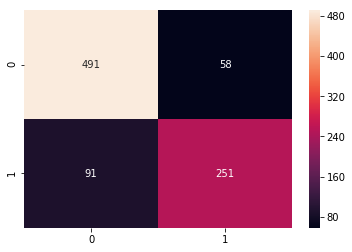

In [69]:

print(eclf1.score(X_train,y_train))
from sklearn.metrics import confusion_matrix #for confusion matrix

sns.heatmap(confusion_matrix(y_train,y_pred),annot=True,fmt='2.0f')



In [ ]:
survival_model.fit(survival_scaler.transform(X_train[survived_params]),X_train['Survived'])